This notebook tests out a tool for extracting a constellation of stars from Gaia DR2, and displaying them as a finder chart. 

In [1]:
from thefriendlystars.constellations.gaia import *

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


First, let's use Simbad to pull up some star by its name, to set the center for our finder chart.

In [2]:
# define the center of the search
center = get('GJ 1132')
print(center)

<SkyCoord (ICRS): (ra, dec) in deg
    (153.7162271, -47.1568464)>


Next, let's pull out the stars within 3 arcminutes of this center, and down to 20th magnitude.

In [3]:
# get constellation of stars surrounding that one
g = Gaia.from_cone(center, radius=3*u.arcmin, magnitudelimit=20)

SELECT source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',153.7162271,-47.1568464,0.05))=1 and phot_g_mean_mag < 20
querying Gaia DR2, centered on <SkyCoord (ICRS): (ra, dec) in deg
    (153.7162271, -47.1568464)> with radius 3.0 arcmin, for G<20
         [gaia] Gaia contains 374 objects


This gives us access to all the Gaia DR2 coordinates through the `coordinates` attribute, as well as their `identifiers` and available `magnitudes`.

In [4]:
g.coordinates

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(153.68605688, -47.17713271,  2905.88788049),
     (153.67086762, -47.13925673,  2599.97498846),
     (153.6542645 , -47.1496036 , 10000.        ),
     (153.69163988, -47.1488937 ,   901.87078726),
     (153.68803549, -47.17230933, 10000.        ),
     (153.74941819, -47.1361324 ,  1155.6343541 ),
     (153.71466434, -47.14362104,  2691.39033544),
     (153.76941393, -47.17812902,  1417.74295039),
     (153.74260212, -47.15972137,   854.93646101),
     (153.75558843, -47.16066419,  1202.12652467),
     (153.78405229, -47.17419959,  5369.59089662),
     (153.71704239, -47.14250636,  3720.15474839),
     (153.71155976, -47.14152998,  1697.85557559),
     (153.69819578, -47.13311622,  6438.3496355 ),
     (153.69180378, -47.13012628, 10000.        ),
     (153.74874219, -47.16827999, 10000.        ),
     (153.66057262, -47.13710914,   200.46632225),
     (153.69102524, -47.13722047,  2437.54127728),
     (153.75150519, -47.17

In [5]:
g.identifiers

DR2
int64
5413414609953081216
5413449931764216320
5413449901707934208
5413438180736560640
5413438077654393216
5413438421251873792
5413438219396897408
5413437218660917888
5413438047598204928


In [6]:
g.magnitudes

G,BP,RP
float32,float32,float32
18.55713,18.957989,18.015781
18.507736,19.151619,17.775295
19.241505,19.800808,18.566597
18.65556,19.710653,17.601328
18.738972,19.322521,17.986002
19.232082,19.817572,18.424105
17.841534,18.270988,17.273514
17.960821,18.782665,17.088469
13.196266,13.491957,12.740925


We can also pull out a nice summary table:

In [7]:
table = g.create_summary_table()
table

DR2,coordinates,G,BP,RP
,"deg,deg,pc",,,
int64,object,float32,float32,float32
5413414609953081216,"153.68605687667758,-47.177132707008475,2905.887880493593",18.55713,18.957989,18.015781
5413449931764216320,"153.670867619224,-47.1392567326113,2599.9749884591047",18.507736,19.151619,17.775295
5413449901707934208,"153.65426450053116,-47.14960359946944,10000.0",19.241505,19.800808,18.566597
5413438180736560640,"153.69163987698283,-47.14889369817175,901.8707872579654",18.65556,19.710653,17.601328
5413438077654393216,"153.688035490815,-47.172309326701985,10000.0",18.738972,19.322521,17.986002
5413438421251873792,"153.74941818692173,-47.13613240170601,1155.6343540996136",19.232082,19.817572,18.424105
5413438219396897408,"153.71466434104124,-47.14362104099114,2691.390335441922",17.841534,18.270988,17.273514
5413437218660917888,"153.76941393008124,-47.17812901598153,1417.7429503893268",17.960821,18.782665,17.088469


If we have proper motions, we can also predict the RA and Dec at any particular epoch (expressed as decimal years):

In [8]:
separations = g.atEpoch(2000).separation(g.center)
i_gj1132 = np.argmin(separations)

now = g.atEpoch(2018.5)[i_gj1132]
then = g.atEpoch(2000.0)[i_gj1132]

print("""
GJ1132 is currently at {} ({:.2f}).
      It used to be at {} ({:.2f}).
""".format(now.icrs.to_string('hmsdms'), 2018.5,
           then.icrs.to_string('hmsdms'), 2000.0))


GJ1132 is currently at 10h14m49.8666s -47d09m16.5256s (2018.50).
      It used to be at 10h14m51.7783s -47d09m24.1906s (2000.00).



From these, we could make plots using the photometry. For example, we could make a color-magnitude diagram.

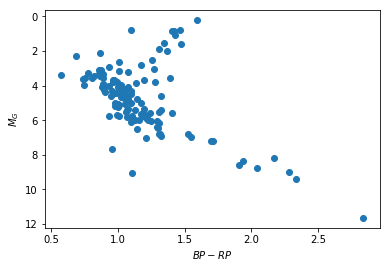

In [9]:
%matplotlib inline

apparent = g.magnitudes['G']
ok = (apparent < 18)&(g.coordinates.distance != 10000*u.pc)
absolute = apparent - 5*np.log10(g.coordinates.distance/(10*u.pc))
plt.scatter((g.magnitudes['BP'] - g.magnitudes['RP'])[ok], absolute[ok])
plt.ylim(plt.ylim()[::-1]); plt.xlabel(r'$BP-RP$'); plt.ylabel(r'$M_G$');

Let's make an automatic finder chart!

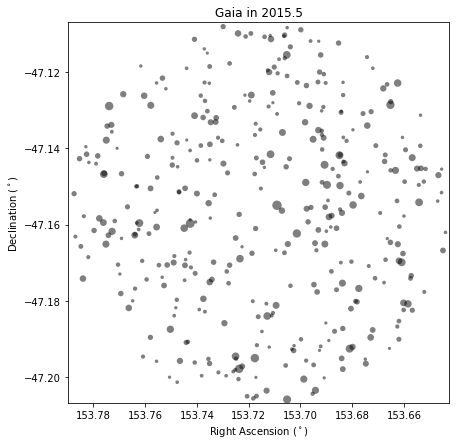

In [10]:
g.finder();

Let's make a plot at some other epoch.

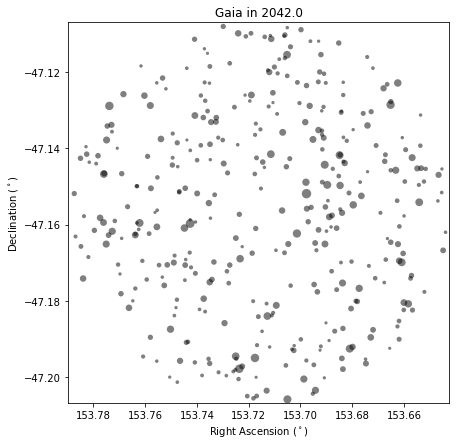

In [11]:
g.finder(2042);

Let's animate it!

100%|██████████| 41/41 [00:02<00:00, 19.24it/s]


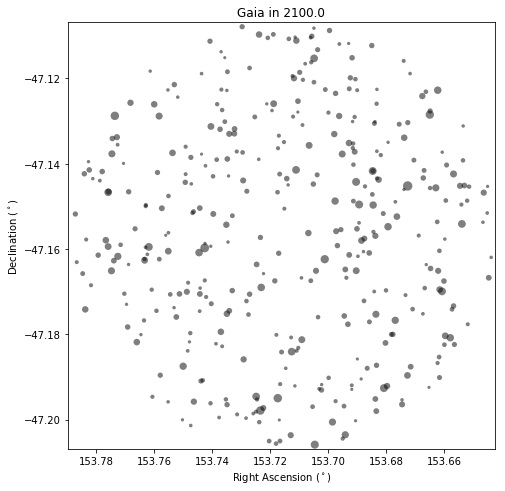

In [12]:
g.animate()

In [13]:
!open constellation.mp4